In [45]:
import keras 
import numpy as np
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization


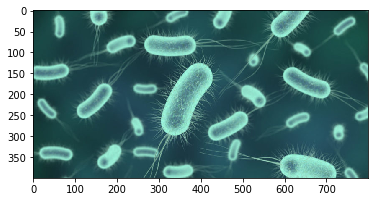

In [46]:
array= np.array([0,0,0,0,0,1,1,1,1,1])
kernel = np.array([-1,1])
conv=np.array([0,0,0,0,0,0,0,0,0])
for ii in range(8): 
         conv[ii] = (kernel*array[ii:ii+2]).sum()   
         conv
img=plt.imread('../datasets/bacterias.jpg')
plt.imshow(img)
plt.show()

In [47]:
conv

array([0, 0, 0, 0, 1, 0, 0, 0, 0])

# 2 D 


In [48]:
kernel=np.array([[-1,1], [-1,1]])
conv=np.zeros((27,27))


In [49]:
#init de model 
model = Sequential()

Conv2D layer to construct the input layer of the network. Kernel size 3 by 3. 
Flatten layer to translate between the image processing and classification part of your network. 
Dense layer to classify the 3 different categories 

In [50]:
img_rows= 4704
img_cols=100
# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 10)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

In [51]:
(x_t, y_t), (x_te, y_te) = mnist.load_data()


In [54]:
# Compile the model 
x_t = x_t.reshape(47040,100,10)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(x_t, x_t, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

ValueError: Error when checking input: expected conv2d_8_input to have 4 dimensions, but got array with shape (47040, 100, 10)

In [ ]:
model.evaluate(test_data, test_labels, batch_size=10)

# We can tweak the convolutions with padding (when needed)
* Calculating the size of the output: 
    * O = ((I-K+2P)/S)+1
* I size of the input 
* K size of the kernel 
* P size of the zero padding 
* Strides 

# Dilated convolutions (changing the format of the convolutions) - multiple scales

  

In [25]:
# Initialize the model
model = Sequential()

# Add the convolutional layer, the same size. 
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [9]:
# Initialize the model
model = Sequential()

# Add the convolutional layer (2 - because every single pixel)
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Deep learning (deep convolutional neural network) 
* Each layer in the network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data. Creating a network with two convolutional layers.

In [21]:
model = Sequential()
# Add a convolutional layer (15 units)
model.add(Conv2D (15,kernel_size=2, activation='relu', input_shape=(img_rows, img_cols,1)))


# Add another convolutional layer (5 units)
model.add(Conv2D (5,kernel_size=2, activation='relu', input_shape=(img_rows, img_cols,1)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [22]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

NameError: name 'train_data' is not defined

# Deep network
Networks with more convolution layers are called deep networks, fit more complex data (hierarchical representations). 

In [23]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


# Reducing parameters with pooling 

In [24]:
# Result placeholder
result = np.zeros((img.shape[0]//2, img.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(img[ii*2:ii*2+2, jj*2:jj*2+2])

In [25]:
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 15)        915       
_________________________________________________________________
flatten_7 (Flatten)          (None, 2160)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 6483      
Total params: 7,473
Trainable params: 7,473
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

NameError: name 'train_data' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, epochs=3, validation_split=0.2, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

In [27]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3])

OSError: Unable to open file (unable to open file: name = 'weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape= (img_rows, img_cols,1)))


# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [28]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

OSError: Unable to open file (unable to open file: name = 'weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [29]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()

NameError: name 'convolution' is not defined